# figure2c

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 

df_bitscore = pd.read_csv("../../outputs/EXP08/EXP08-08/bitscore.csv", index_col = 0)
df_bitscore

,ID,description,Natural,CMVAE,GCVAE
RF00001,5S_rRNA,5S ribosomal RNA,70.108745,123.155918,98.888120
RF00002,5_8S_rRNA,5.8S ribosomal RNA,90.842727,135.292270,123.664390
RF00003,U1,U1 spliceosomal RNA,117.702254,156.938946,133.522630
RF00004,U2,U2 spliceosomal RNA,98.615207,198.685840,130.565140
RF00006,Vault,Vault RNA,58.438125,74.998840,72.616530
...,...,...,...,...,...
RF04152,mir-3618,mir-3618 microRNA precursor family,106.471000,104.322000,109.300000
RF04155,mir-9236,mir-9236 microRNA precursor family,100.180680,87.858974,103.635000
RF04156,MIR2670,MIR2670 microRNA precursor family,175.654839,218.504579,196.008913
RF04163,mir-8364,mir-8364 microRNA precursor family,74.249436,79.822386,85.007366


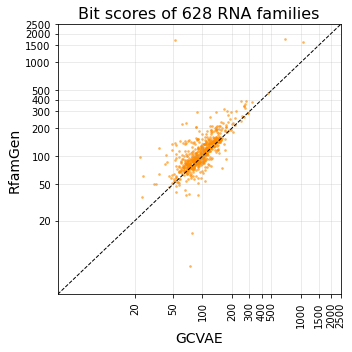

In [3]:
# plot scatter 
import numpy as np
import seaborn as sns 
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)

# df_bitscore = pd.DataFrame(bitscores).T.dropna()

fig, ax1 = plt.subplots(figsize = (5, 5))
def transform(x):
    return np.log2(x - min(df_bitscore["CMVAE"]) + 1)

data_cmvae = transform(df_bitscore["CMVAE"])
data_gcvae = transform(df_bitscore["GCVAE"])

ax1.scatter(data_gcvae, data_cmvae, marker = ".", alpha = 0.5, s = 12, color = "darkorange")
ax1.grid(alpha = 0.3)
ax1.plot(
    [transform(0), transform(2500)],
    [transform(0), transform(2500)],
    color = "black", linestyle = "dashed", linewidth =1)

ax1.set_title("Bit scores of 628 RNA families", fontsize = 16)
ax1.set_xlabel("GCVAE", fontsize = 14)
ax1.set_ylabel("RfamGen", fontsize = 14)
ax1.set_ylim(transform(0), transform(2500))
ax1.set_xlim(transform(0), transform(2500))

ticks = [20 ,50, 100, 200, 300, 400]+[500*i for i in range(1,6)]

plt.xticks([np.log2(t+1) for t in ticks], ticks, rotation=90)
plt.yticks([np.log2(t+1) for t in ticks], ticks)


plt.tight_layout()
# fig.subplots_adjust(right=0.76)
plt.savefig("../../outputs/figures/figure2c.pdf",transparent = True)
# plt.savefig("../outputs/EXP08/EXP08-08/scatter_gc_vs_cm.pdf", dpi = 300)
# plt.savefig("../outputs/EXP08/EXP08-08/scatter_gc_vs_cm.png", dpi = 300)

In [10]:
min(df_bitscore["CMVAE"])

-2.4942516268980475

In [11]:
min(df_bitscore["GCVAE"])

20.37653